<a href="https://colab.research.google.com/github/OuSSama385/Projects/blob/main/bankcustomersatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/kaggle


/content/drive/MyDrive/kaggle


In [24]:
#!pip install pycaret
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
from pycaret.classification import *

In [3]:
train=pd.read_csv('train.csv')

In [25]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


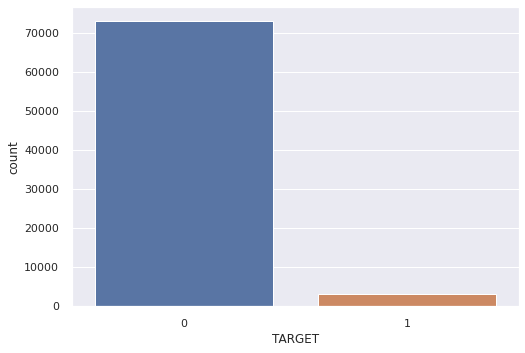

In [28]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="TARGET", data=train)

In [7]:
exp = setup(data = train, target = 'TARGET', session_id=123, use_gpu=True)


,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(76020, 371)"
5,Missing Values,False
6,Numeric Features,142
7,Categorical Features,228
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9609,0.8202,0.0048,0.3333,0.0095,0.0084,0.0362
1,0.9611,0.8255,0.0048,0.5000,0.0096,0.0088,0.0462
2,0.9611,0.8207,0.0048,0.5000,0.0096,0.0088,0.0462
3,0.9611,0.8288,0.0049,0.3333,0.0096,0.0085,0.0363
4,0.9609,0.8423,0.0000,0.0000,0.0000,-0.0004,-0.0028
5,0.9611,0.8383,0.0097,0.5000,0.0190,0.0175,0.0654
6,0.9613,0.8406,0.0097,0.6667,0.0190,0.0180,0.0771
7,0.9609,0.8270,0.0145,0.4286,0.0280,0.0256,0.0731
8,0.9603,0.8200,0.0000,0.0000,0.0000,-0.0015,-0.0055
9,0.9611,0.8486,0.0145,0.5000,0.0282,0.0260,0.0801


In [10]:
tuned_lgbm = tune_model(lgbm, optimize = 'AUC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9615,0.8296,0.0145,0.7500,0.0284,0.0270,0.1009
1,0.9613,0.8372,0.0097,0.6667,0.0190,0.0180,0.0771
2,0.9609,0.8336,0.0000,0.0000,0.0000,-0.0004,-0.0028
3,0.9611,0.8348,0.0049,0.3333,0.0096,0.0085,0.0363
4,0.9607,0.8517,0.0048,0.2500,0.0095,0.0080,0.0299
5,0.9613,0.8482,0.0048,1.0000,0.0096,0.0092,0.0681
6,0.9609,0.8498,0.0000,0.0000,0.0000,-0.0004,-0.0028
7,0.9613,0.8333,0.0193,0.5714,0.0374,0.0349,0.1000
8,0.9611,0.8197,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9611,0.8433,0.0048,0.5000,0.0096,0.0088,0.0462


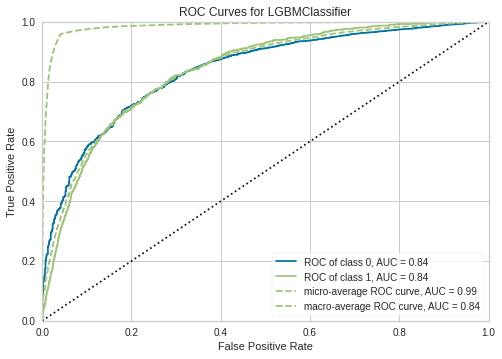

In [11]:
plot_model(tuned_lgbm, plot = 'auc')


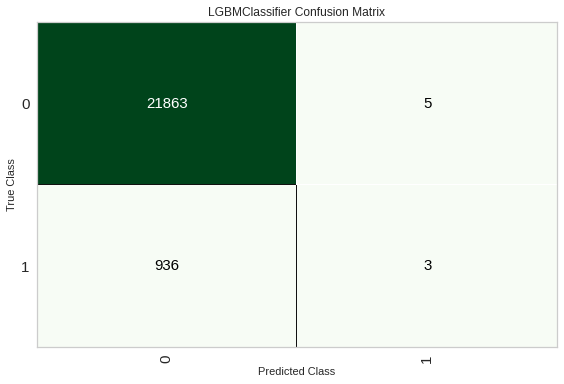

In [12]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')


In [13]:
predict_model(tuned_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9587,0.8379,0.0032,0.375,0.0063,0.0056,0.0315


In [31]:
final_lgbm = finalize_model(tuned_lgbm)
predict_model(final_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9592,0.867,0.0128,0.8,0.0252,0.0239,0.098


In [15]:
#save_model(final_lgbm,'Finallgbm')


In [17]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9615,0.8162,0.0145,0.7500,0.0284,0.0270,0.1009
1,0.9613,0.8278,0.0097,0.6667,0.0190,0.0180,0.0771
2,0.9604,0.8202,0.0048,0.1667,0.0094,0.0072,0.0222
3,0.9605,0.8183,0.0000,0.0000,0.0000,-0.0015,-0.0055
4,0.9609,0.8323,0.0000,0.0000,0.0000,-0.0004,-0.0028
5,0.9609,0.8403,0.0000,0.0000,0.0000,-0.0004,-0.0028
6,0.9611,0.8360,0.0048,0.5000,0.0096,0.0088,0.0462
7,0.9611,0.8277,0.0048,0.5000,0.0096,0.0088,0.0462
8,0.9609,0.8130,0.0048,0.3333,0.0095,0.0084,0.0362
9,0.9609,0.8359,0.0048,0.3333,0.0095,0.0084,0.0362


In [18]:
tuned_ada = tune_model(ada, optimize = 'AUC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9613,0.8288,0.0048,1.0000,0.0096,0.0092,0.0681
1,0.9613,0.8369,0.0097,0.6667,0.0190,0.0180,0.0771
2,0.9613,0.8211,0.0048,1.0000,0.0096,0.0092,0.0681
3,0.9613,0.8230,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9609,0.8439,0.0000,0.0000,0.0000,-0.0004,-0.0028
5,0.9611,0.8316,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9611,0.8426,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9609,0.8276,0.0000,0.0000,0.0000,-0.0004,-0.0028
8,0.9611,0.8180,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9613,0.8385,0.0048,1.0000,0.0096,0.0092,0.0681


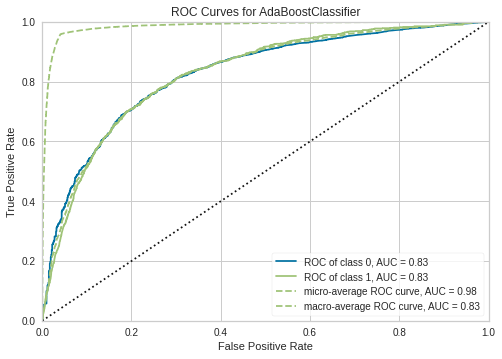

In [19]:
plot_model(tuned_ada, plot = 'auc')


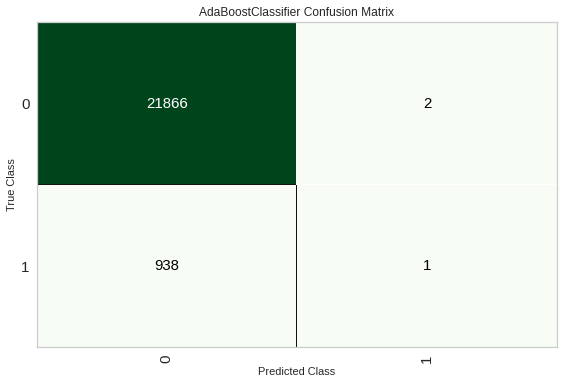

In [20]:
plot_model(tuned_ada, plot = 'confusion_matrix')


In [21]:
predict_model(tuned_ada);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9588,0.8263,0.0011,0.3333,0.0021,0.0019,0.0169


In [22]:
final_ada = finalize_model(tuned_ada)
predict_model(final_ada);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9587,0.8436,0.0,0.0,0.0,-0.0002,-0.0019


In [23]:
save_model(final_ada,'Finalada')


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('dummy', Dummify(target='TARGET')),
                 ('fix_perfect', Remove_100(target='TARGET')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('d